# Prediction of concrete strength

In [1]:
# connecting kaggle api to notebook
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [2]:
#Downloading dataset from Kaggle 
api.dataset_download_files('elikplim/concrete-compressive-strength-data-set') 
#Path inside the brackets is — username (of_person_who_published_dataset)/name (of_the_Kaggle_dataset).

In [3]:
# downloading as zipfile and extracting the data
from zipfile import ZipFile
zf = ZipFile('concrete-compressive-strength-data-set.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

The aim of this project is to find the compressive strength of concrete. There are 8 input variables and 1 output variable.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [5]:
df=pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isna().sum() # no null values

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

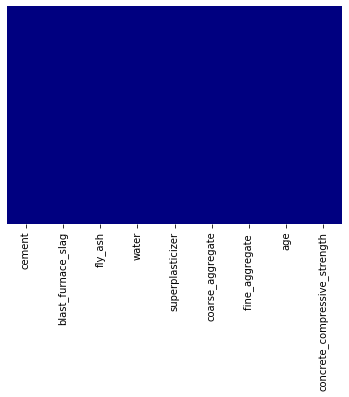

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='jet'); # no null values

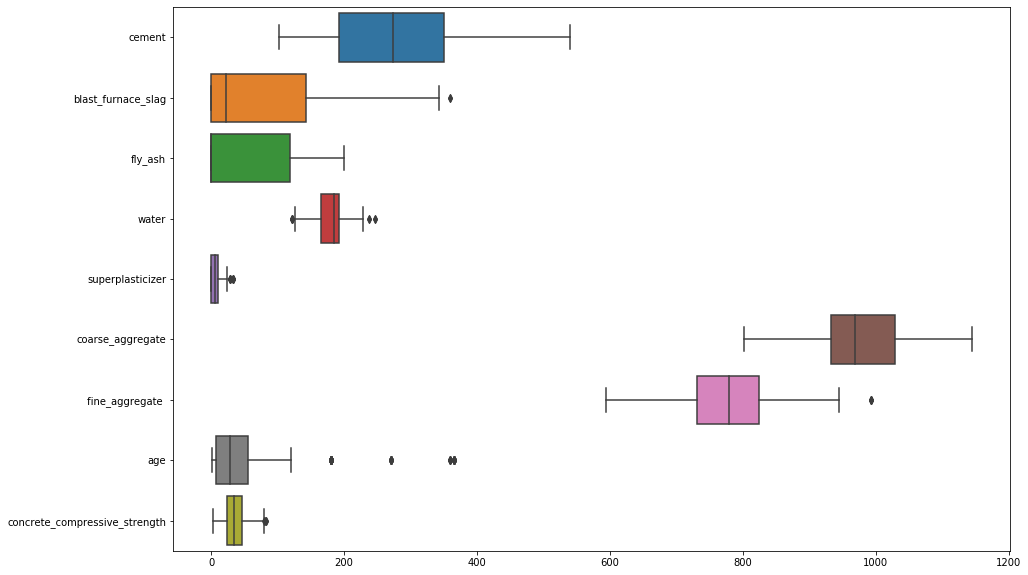

In [9]:
#Box plot showing the distribution of data across each column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient='h');

In [10]:
# black dots present in the box plots are the representation of outliers

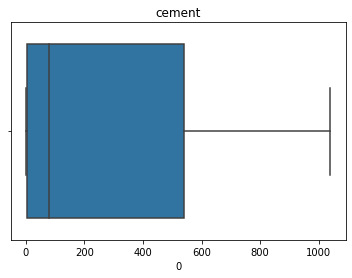

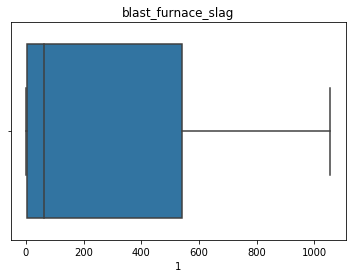

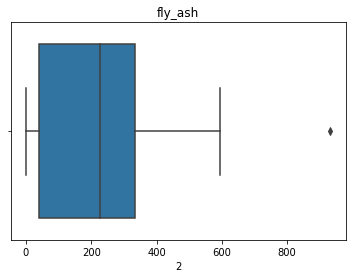

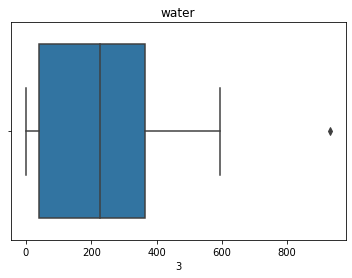

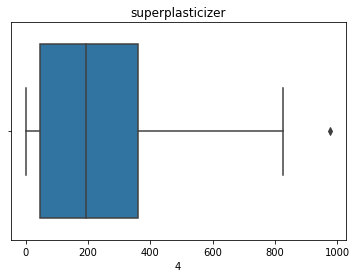

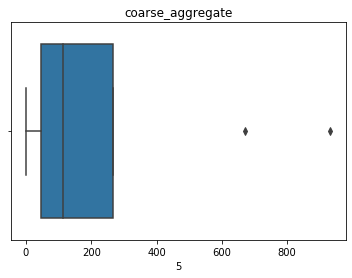

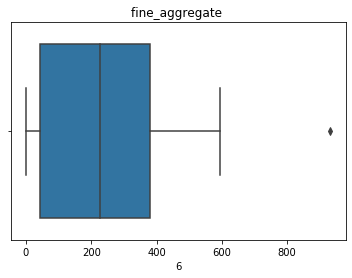

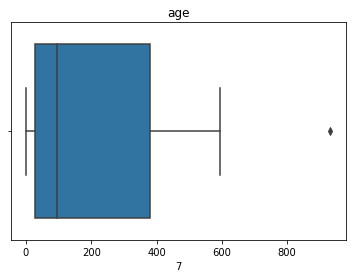

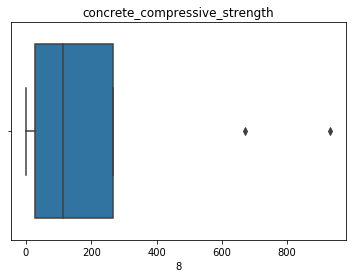

In [11]:
# plotting boxplot seperately
for i in range(len(df.columns)):
    sns.boxplot(x=df.iloc[i])
    plt.title(df.columns[i])
    plt.show()
   

In [12]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


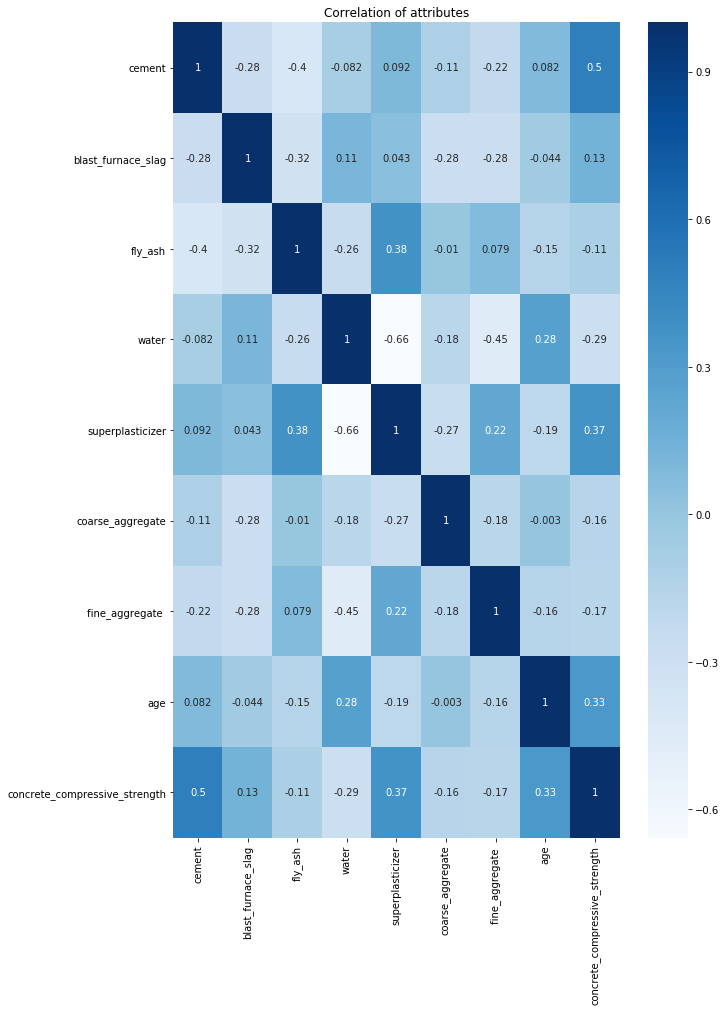

In [45]:
#Heatmap displaying correalation between each attributes
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues');
plt.title('Correlation of attributes');
plt.show()

In [46]:
fig = px.histogram(df, x='concrete_compressive_strength',marginal='box',nbins=21,title='Distribution of concrete strength')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(df,x='cement',marginal='box',nbins=21,title='distribution of cement')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(df,x='superplasticizer',marginal='box',nbins=21,title='Distribution of superplasticizer')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(df,x='water',marginal='box',nbins=21,title='Distribution of water')
fig.update_layout(bargap=0.1)
fig.show()

## Building Model

In [18]:
X=df.iloc[:,:8]#exc('class',axis=1) #features
y=df.iloc[:,8:] #target

In [19]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [20]:
y.head()

,concrete_compressive_strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [21]:
#Splitting dataset for training and testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
s=StandardScaler()

In [25]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)
#  fit method calculate mean and standard deviation from the training data
# transform method applies the parameters on training data to transform.
# X_test data transformed based on the parameter values calculated by using the fit method on training dataset

In [26]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

## LinearRegression

In [27]:
linreg=LinearRegression()

In [28]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# two lists named models and scores are created
models=['LinearRegression','Lasso regression(alpha=0.2)','Lasso regression(alpha=0.4)','Lasso regression(alpha=0.6)','Lasso regression(alpha=0.8)','Lasso regression(alpha=1)','Ridge regression(alpha=0.2)','Ridge regression(alpha=0.4)','Ridge regression(alpha=0.6)','Ridge regression(alpha=0.8)','Ridge regression(alpha=1)','Random Forest Regression','DecisionTree Regression']
scores=[]
rms=[]
y_pred_lin=linreg.predict(X_test)
scores.append(r2_score(y_test,y_pred_lin))
score1 = linreg.score(X_test,y_test)

print(score1)

0.5943782479239207


In [30]:
rms.append(np.sqrt(mean_squared_error(y_test,y_pred_lin)))
rms

[10.47620198211852]

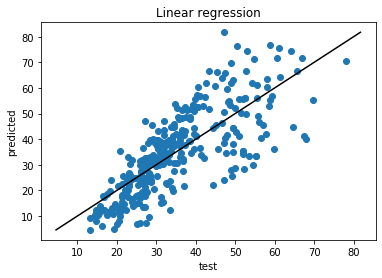

In [31]:
plt.scatter(y_pred_lin,y_test)
plt.title('Linear regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

## Lasso regression

In [32]:
for i in [0.2,0.4,0.6,0.8,1]:
    lass=Lasso(alpha=i)
    lass.fit(X_train,y_train)
    y_lass_predicted=lass.predict(X_test)
    scores.append(r2_score(y_test,y_lass_predicted))
    rms.append(np.sqrt(mean_squared_error(y_test,y_lass_predicted)))
y_lass_predicted  

array([54.98908714, 49.00434917, 61.33083148, 48.65451929, 19.76205067,
       37.86922758, 26.60785832, 43.38616009, 31.44366679, 39.1129279 ,
       34.62429317, 24.46635909, 68.32229071, 47.49370001, 26.86158641,
       37.31458456, 29.62997112, 28.26260209, 33.21003049, 29.57026124,
       34.71049362, 27.73483815, 37.24000717, 26.02797969, 32.94748183,
       35.57211667, 21.55164225, 41.47617428, 38.59296447, 27.08060571,
       36.74363181, 33.69056484, 38.80412814, 43.1667823 , 28.61374355,
       31.50794579, 30.45137196, 38.08424635, 23.14284485, 37.26720642,
       26.39982513, 20.32963314, 31.78982871, 47.17423872, 22.36335344,
       52.537188  , 49.30652843, 57.02602284, 25.90075072, 22.44159195,
       39.60766117, 35.56481727, 25.87907067, 30.81959852, 41.12333769,
       47.90194215, 30.21926223, 22.91655991, 31.1030657 , 24.69689511,
       37.80816791, 27.17319356, 30.84672791, 55.32492194, 26.22580842,
       26.11382891, 33.07629143, 22.59613234, 26.95136297, 26.78

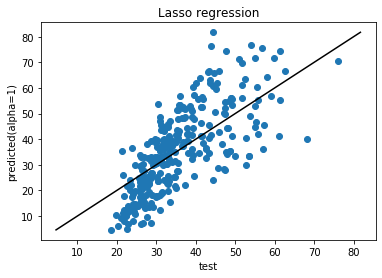

In [33]:
plt.scatter(y_lass_predicted,y_test)
plt.title('Lasso regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted(alpha=1)')
plt.show()

In [34]:
rms

[10.47620198211852,
 10.47316555193562,
 10.622877227159835,
 10.817349956489965,
 11.053931430387122,
 11.177537874277723]

## Ridge regression

In [35]:
for i in [0.2,0.4,0.6,0.8,1]:
    rd=Ridge(alpha=i)
    rd.fit(X_train,y_train)
    y_rd_predicted=lass.predict(X_test)
    scores.append(r2_score(y_test,y_rd_predicted))
    rms.append(np.sqrt(mean_squared_error(y_test,y_rd_predicted)))
y_rd_predicted  

array([54.98908714, 49.00434917, 61.33083148, 48.65451929, 19.76205067,
       37.86922758, 26.60785832, 43.38616009, 31.44366679, 39.1129279 ,
       34.62429317, 24.46635909, 68.32229071, 47.49370001, 26.86158641,
       37.31458456, 29.62997112, 28.26260209, 33.21003049, 29.57026124,
       34.71049362, 27.73483815, 37.24000717, 26.02797969, 32.94748183,
       35.57211667, 21.55164225, 41.47617428, 38.59296447, 27.08060571,
       36.74363181, 33.69056484, 38.80412814, 43.1667823 , 28.61374355,
       31.50794579, 30.45137196, 38.08424635, 23.14284485, 37.26720642,
       26.39982513, 20.32963314, 31.78982871, 47.17423872, 22.36335344,
       52.537188  , 49.30652843, 57.02602284, 25.90075072, 22.44159195,
       39.60766117, 35.56481727, 25.87907067, 30.81959852, 41.12333769,
       47.90194215, 30.21926223, 22.91655991, 31.1030657 , 24.69689511,
       37.80816791, 27.17319356, 30.84672791, 55.32492194, 26.22580842,
       26.11382891, 33.07629143, 22.59613234, 26.95136297, 26.78

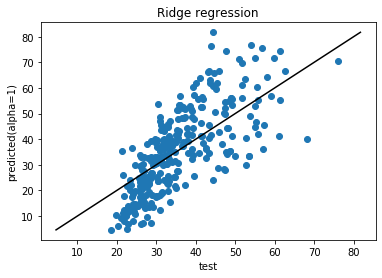

In [36]:
plt.scatter(y_rd_predicted,y_test)
plt.title('Ridge regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted(alpha=1)')
plt.show()

In [37]:
rfr=RandomForestRegressor(random_state=41)
rfr.fit(X_train,y_train)
y_rfr_predicted=rfr.predict(X_test)
scores.append(r2_score(y_test,y_rfr_predicted))
rms.append(np.sqrt(mean_squared_error(y_test,y_rfr_predicted)))

C:\Users\rajeshkc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\rajeshkc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



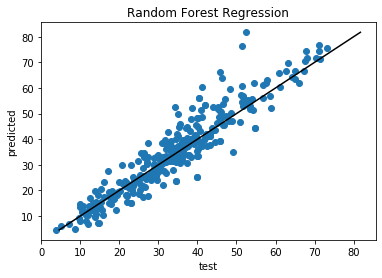

In [38]:
plt.scatter(y_rfr_predicted,y_test)
plt.title('Random Forest Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

In [39]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_dtr_predicted=dtr.predict(X_test)
scores.append(r2_score(y_test,y_dtr_predicted))
rms.append(np.sqrt(mean_squared_error(y_test,y_dtr_predicted)))

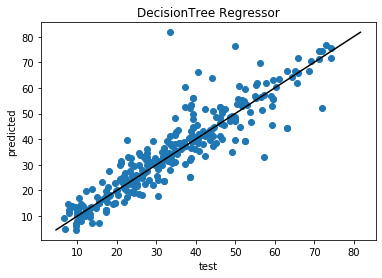

In [40]:
plt.scatter(y_dtr_predicted,y_test)
plt.title('DecisionTree Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

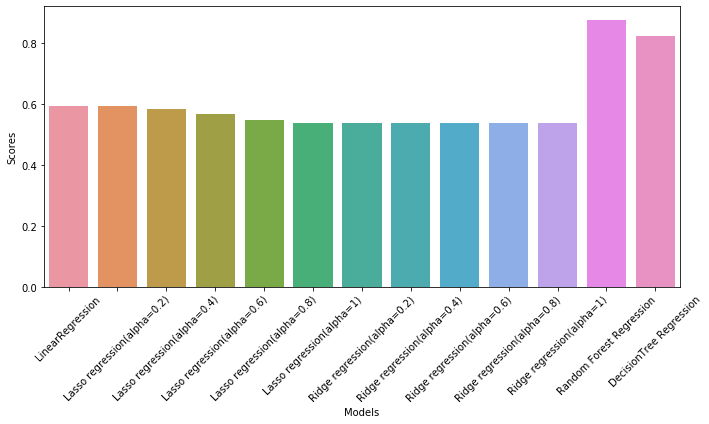

In [41]:
#plotting barplot
df1= pd.DataFrame(list(zip(models,scores)),columns =['Models', 'Scores']) 
plt.figure(figsize=(10,6))
sns.barplot(x=df1["Models"],y=df1["Scores"])

plt.xticks(rotation=45)
plt.tight_layout()

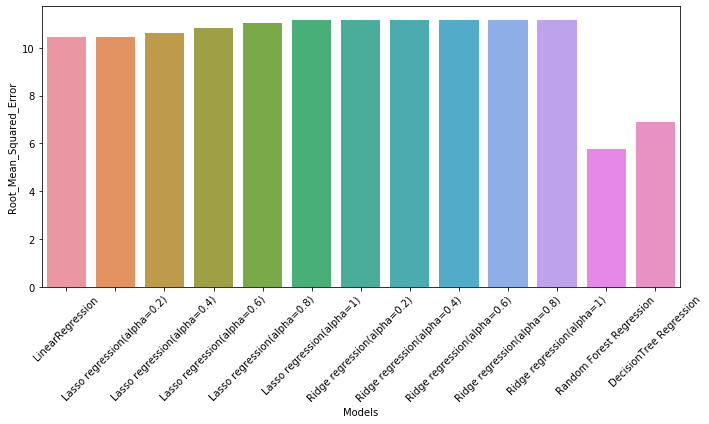

In [42]:
df2= pd.DataFrame(list(zip(models,rms)),columns =['Models', 'Root_Mean_Squared_Error']) 
plt.figure(figsize=(10,6))
sns.barplot(x=df2['Models'],y=df2['Root_Mean_Squared_Error'])

plt.xticks(rotation=45)
plt.tight_layout()

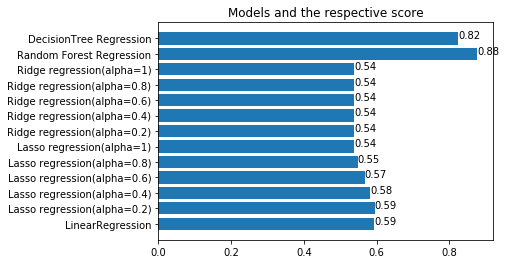

In [51]:
# alternative way of plotting
plt.barh(models,scores)
plt.title('Models and the respective score',loc ='center', )

for index, value in enumerate(scores):
    plt.text(value, index, str(round(value,2)))


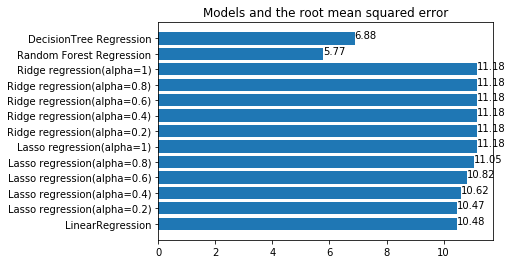

In [49]:
plt.barh(models,rms)
plt.title('Models and the root mean squared error',loc ='center', )

for index, value in enumerate(rms):
    plt.text(value, index, str(round(value,2)))

In [ ]:
#Random Forest regression model gives a score of 0.88